In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

np.random.seed(0)
n_samples = 300

In [ ]:
data = {
    'valor_medio_gasto': np.random.randn(n_samples) * 20 + 200,
    'frequencia_compras': np.random.randn(n_samples) * 5 + 15,
    'categorias_produtos': np.random.randn(n_samples) * 2 + 8
}

df = pd.DataFrame(data)

print(df.head())

   valor_medio_gasto  frequencia_compras  categorias_produtos
0         235.281047            8.467366             4.899141
1         208.003144           23.290653             8.834638
2         219.574760           14.409180             6.111263
3         244.817864           11.599109             8.476206
4         237.351160           18.331915             5.188074


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

df['cluster'] = clusters

print(df['cluster'].value_counts())
print(df.head())

cluster
0    109
2    101
1     90
Name: count, dtype: int64
   valor_medio_gasto  frequencia_compras  categorias_produtos  cluster
0         235.281047            8.467366             4.899141        1
1         208.003144           23.290653             8.834638        2
2         219.574760           14.409180             6.111263        1
3         244.817864           11.599109             8.476206        1
4         237.351160           18.331915             5.188074        1


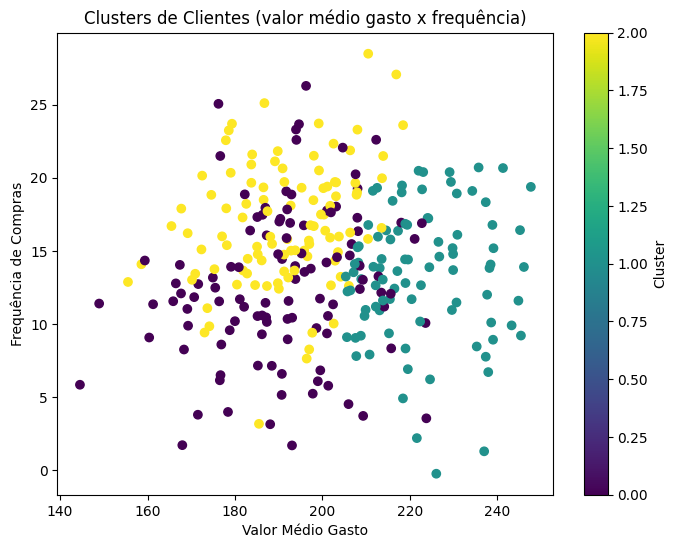

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df['valor_medio_gasto'], df['frequencia_compras'], c=df['cluster'], cmap='viridis')
plt.xlabel('Valor Médio Gasto')
plt.ylabel('Frequência de Compras')
plt.title('Clusters de Clientes (valor médio gasto x frequência)')
plt.colorbar(label='Cluster')
plt.show()

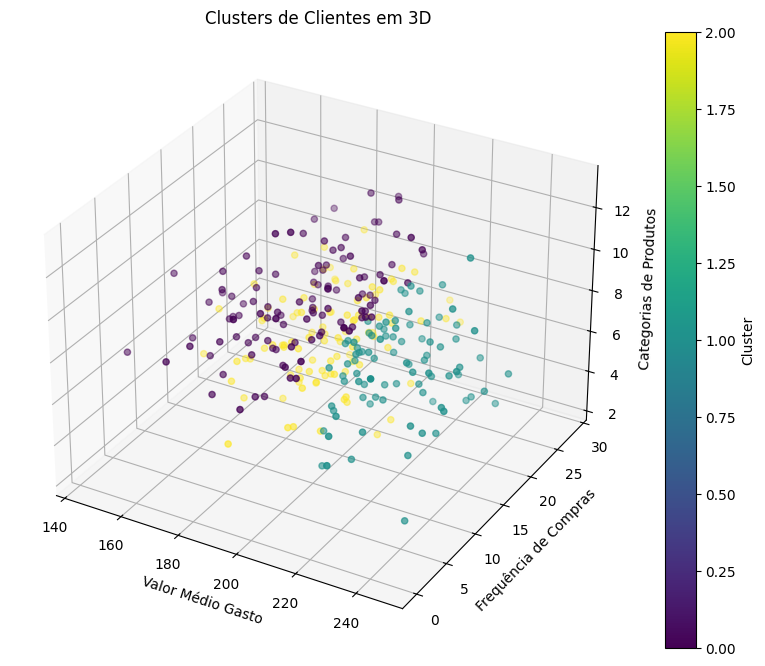

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

scat = ax.scatter(
    df['valor_medio_gasto'],
    df['frequencia_compras'],
    df['categorias_produtos'],
    c=df['cluster'], cmap='viridis'
)

ax.set_xlabel('Valor Médio Gasto')
ax.set_ylabel('Frequência de Compras')
ax.set_zlabel('Categorias de Produtos')
plt.title('Clusters de Clientes')
fig.colorbar(scat, ax=ax, label='Cluster')
plt.show()